In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
books_df = pd.read_csv("books.csv")
tags_df = pd.read_csv("book_tags.csv")
rat_df = pd.read_csv("ratings.csv")

In [9]:
books_df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


In [10]:
tags_df

,goodreads_book_id,tag_id,count
0,386,30574,565
1,386,19733,280
2,386,21689,182
3,386,21773,99
4,386,19742,78
...,...,...,...
40195,31845516,13254,7
40196,31845516,19734,7
40197,31845516,833,7
40198,31845516,23471,6


In [11]:
rat_df

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4
...,...,...,...
233378,36947,6939,5
233379,22352,617,2
233380,42785,1613,4
233381,10622,610,5


In [14]:
books_df['original_title'].isnull().sum()

36

In [15]:
books_df.dropna(subset=['original_title'],inplace=True)

In [16]:
books_df_unique = books_df['book_id'].unique()

In [27]:
book_tags = tags_df[tags_df['goodreads_book_id'].isin(books_df_unique)]

In [28]:
book_tags

,goodreads_book_id,tag_id,count
4200,9522,30574,22451
4201,9522,13561,301
4202,9522,7778,178
4203,9522,11557,165
4204,9522,13547,164
...,...,...,...
4295,9522,23909,3
4296,9522,4600,3
4297,9522,4607,3
4298,9522,7743,3


In [49]:
ratings_clean = rat_df[rat_df['book_id'].isin(books_df_unique)]

In [50]:
ratings_clean

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4
...,...,...,...
233378,36947,6939,5
233379,22352,617,2
233380,42785,1613,4
233381,10622,610,5


In [21]:
rat_df['user_id'].nunique()

40836

In [23]:
tags_df['tag_id'].nunique()

3651

In [30]:
tag_counts = tags_df['tag_id'].value_counts()

In [31]:
most_common_tags = tag_counts[tag_counts == tag_counts.max()].index

In [33]:
min(most_common_tags)

4600

In [34]:
merged_data = pd.merge(tags_df, books_df[['book_id', 'title']], left_on='goodreads_book_id', right_on='book_id')

In [35]:
merged_data

,goodreads_book_id,tag_id,count,book_id,title
0,9522,30574,22451,9522,Beyond Band of Brothers: The War Memoirs of Ma...
1,9522,13561,301,9522,Beyond Band of Brothers: The War Memoirs of Ma...
2,9522,7778,178,9522,Beyond Band of Brothers: The War Memoirs of Ma...
3,9522,11557,165,9522,Beyond Band of Brothers: The War Memoirs of Ma...
4,9522,13547,164,9522,Beyond Band of Brothers: The War Memoirs of Ma...
...,...,...,...,...,...
95,9522,23909,3,9522,Beyond Band of Brothers: The War Memoirs of Ma...
96,9522,4600,3,9522,Beyond Band of Brothers: The War Memoirs of Ma...
97,9522,4607,3,9522,Beyond Band of Brothers: The War Memoirs of Ma...
98,9522,7743,3,9522,Beyond Band of Brothers: The War Memoirs of Ma...


In [36]:
book_tag_counts = merged_data['title'].value_counts()


In [37]:
book_tag_counts

Beyond Band of Brothers: The War Memoirs of Major Dick Winters    100
Name: title, dtype: int64

In [38]:
most_tagged_book = book_tag_counts.idxmax()

In [39]:
most_tagged_book

'Beyond Band of Brothers: The War Memoirs of Major Dick Winters'

In [41]:
tag_user_records = tags_df.groupby('tag_id').nunique()

In [42]:
tag_user_records

,goodreads_book_id,count
tag_id,,
0,3,2
1,1,1
9,1,1
13,1,1
40,1,1
...,...,...
33933,1,1
33984,1,1
34057,1,1


In [44]:
sorted_tags = tag_user_records.sort_values(by='count',ascending=False)

In [45]:
sorted_tags

,goodreads_book_id,count
tag_id,,
30574,400,396
8717,391,340
21689,401,339
4605,400,299
19733,379,287
...,...,...
13779,1,1
13801,1,1
13802,1,1


In [46]:
top_20_tags = sorted_tags.head(20)

<Figure size 720x432 with 0 Axes>

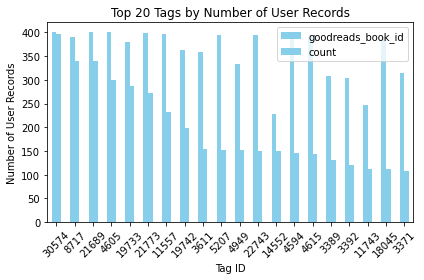

In [47]:
plt.figure(figsize=(10, 6))
top_20_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags by Number of User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()